In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


df = pd.read_csv('~/Downloads/Auto.csv')
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(int)
predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
target = 'mpg'
scaler = StandardScaler()

df[predictors] = scaler.fit_transform(df[predictors])

In [2]:
from sklearn.decomposition import PCA


model = PCA(n_components=6)
model.fit(df[predictors])

PCA(n_components=6)

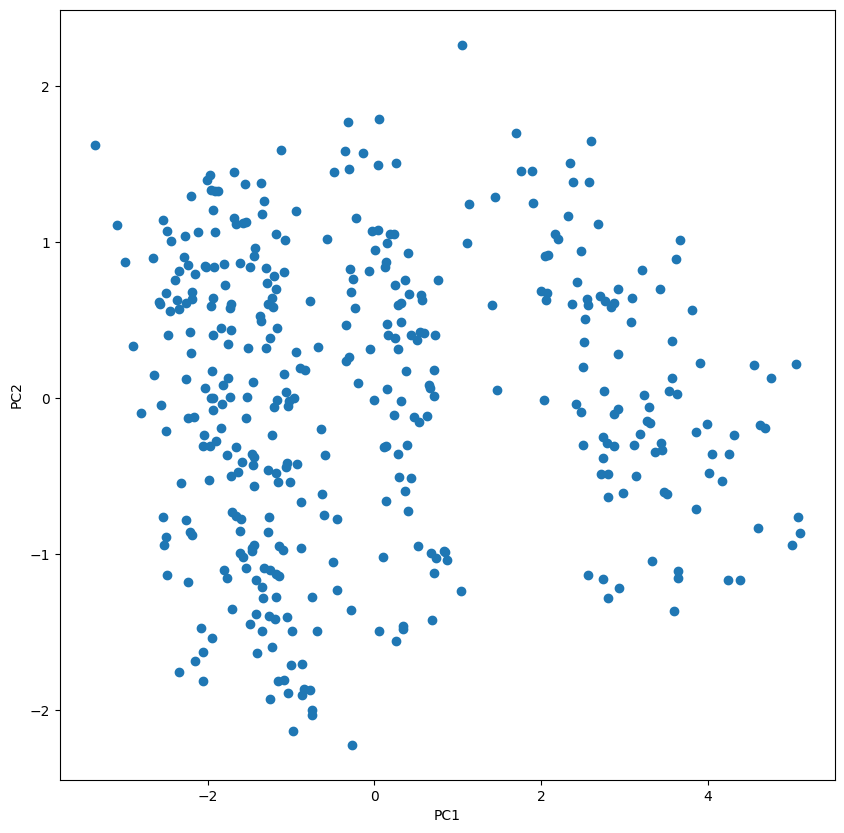

In [3]:
import matplotlib.pyplot as plt

transformed = model.transform(df[predictors])[:,:2]

fig = plt.figure(figsize=(10, 10))
plt.scatter(transformed[:,0], transformed[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
[[ 1.          0.9508233   0.84298336  0.89752734 -0.50468338 -0.34564744]
 [ 0.9508233   1.          0.897257    0.9329944  -0.5438005  -0.36985521]
 [ 0.84298336  0.897257    1.          0.86453774 -0.68919551 -0.41636148]
 [ 0.89752734  0.9329944   0.86453774  1.         -0.4168392  -0.30911988]
 [-0.50468338 -0.5438005  -0.68919551 -0.4168392   1.          0.29031611]
 [-0.34564744 -0.36985521 -0.41636148 -0.30911988  0.29031611  1.        ]]


/Users/esten/miniconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


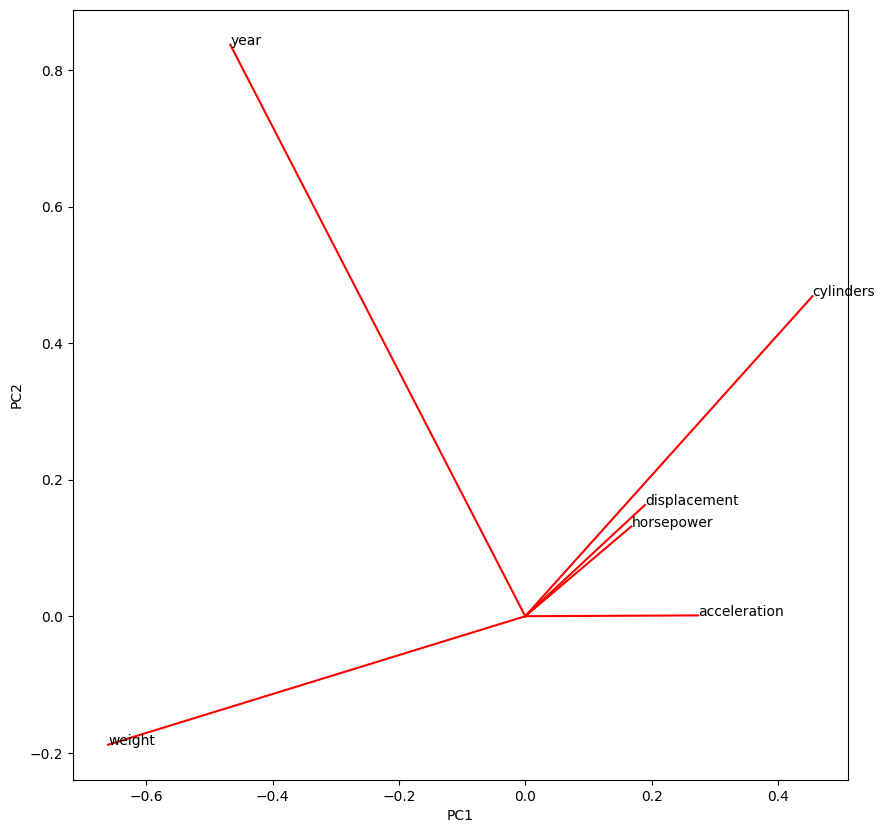

In [13]:
components = model.transform(np.eye(6))
print(predictors)
print(np.corrcoef(df[predictors].T))

fig = plt.figure(figsize=(10, 10))
plt.xlabel('PC1')
plt.ylabel('PC2')

for j in range(components.shape[1]):
    plt.plot([0, components[0,j]], [0, components[1,j]], c='red')
    plt.annotate(predictors[j], (components[0, j], components[1, j]))

plt.show()

[0.7095253  0.13993495 0.11213651 0.0221448  0.01019548 0.00606296]


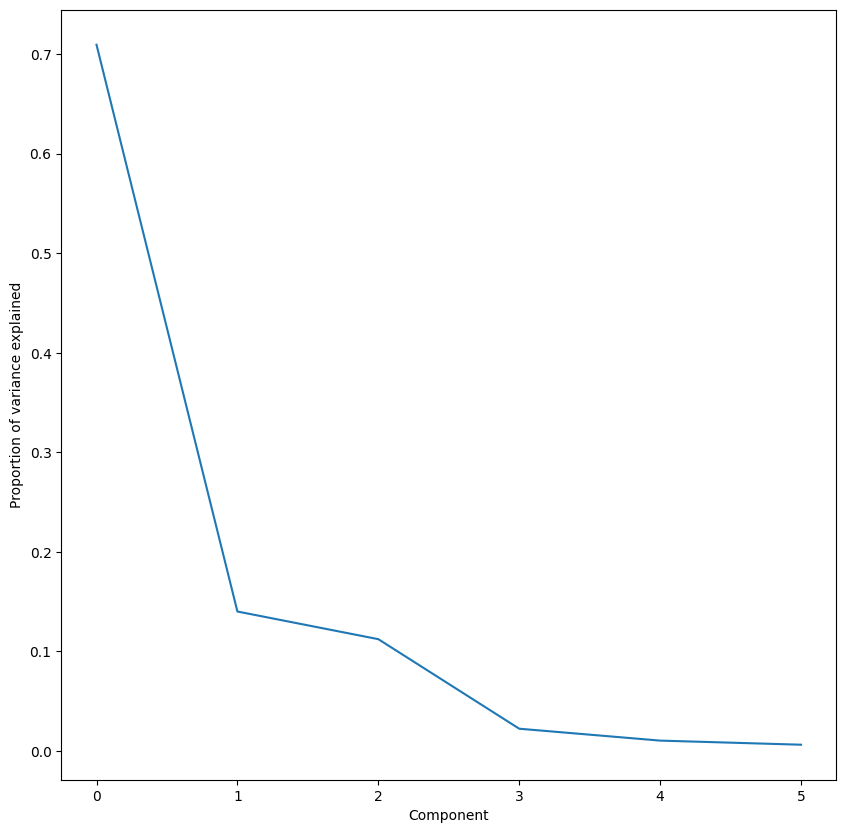

In [5]:
import numpy as np


fig = plt.figure(figsize=(10, 10))
plt.xlabel('Component')
plt.ylabel('Proportion of variance explained')
print(model.explained_variance_ratio_)
plt.plot(np.arange(len(model.explained_variance_ratio_)), model.explained_variance_ratio_)

plt.show()

In [6]:
np.round(np.corrcoef(model.transform(df[predictors]).T), 2)

array([[ 1.,  0.,  0., -0.,  0., -0.],
       [ 0.,  1.,  0., -0.,  0., -0.],
       [ 0.,  0.,  1., -0.,  0., -0.],
       [-0., -0., -0.,  1., -0.,  0.],
       [ 0.,  0.,  0., -0.,  1., -0.],
       [-0., -0., -0.,  0., -0.,  1.]])